- load the data from lat-lng.csv

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
iris_df = pd.read_csv('iris.data')

In [73]:
iris_df.columns = ['pl','pw','sl','sw','class']

In [80]:
iris_df[['pl','pw','sl','sw']].head()

,pl,pw,sl,sw
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


### Elbow break rule

In [81]:
inertia=[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris_df[['pl','pw','sl','sw']])
    inertia.append(kmeans.inertia_)

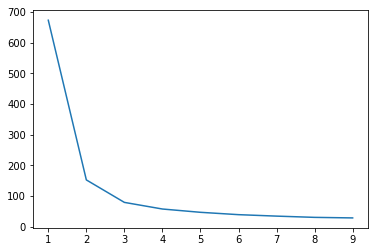

In [83]:
plt.plot(range(1,10), inertia)

In [84]:
iris_kmeans = KMeans(n_clusters=3)

In [85]:
iris_kmeans.fit(iris_df[['pl','pw','sl','sw']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [91]:
iris_df['centers'] = iris_kmeans.labels_

In [98]:
iris_df[iris_df['class']=='Iris-virginica'].groupby('centers').count()

,pl,pw,sl,sw,class
centers,,,,,
0,36,36,36,36,36
2,14,14,14,14,14


In [99]:
iris_df[iris_df['class']=='Iris-setosa'].groupby('centers').count()

,pl,pw,sl,sw,class
centers,,,,,
1,49,49,49,49,49


In [100]:
iris_df[iris_df['class']=='Iris-versicolor'].groupby('centers').count()

,pl,pw,sl,sw,class
centers,,,,,
0,2,2,2,2,2
2,48,48,48,48,48


In [77]:
np.unique(iris_df['class'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
df = pd.read_csv('with_user_id.csv')

In [4]:
len(df)

1048575

In [5]:
df_us = df[(df['lat']>0) & (df['lng']< 0)]
len(df_us)

932093

In [6]:
df_us_samp = df_us.sample(frac=0.1, random_state=101)
len(df_us_samp)

93209

In [9]:
df_us_samp.head(3)

,userid,lat,lng
958713,4466,38.952334,-77.447948
444404,1544,39.763549,-86.331929
763759,3252,42.051870,-70.185600


- plot the graph for understanding data

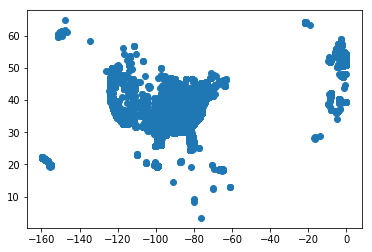

In [7]:
plt.scatter(df_us_samp['lng'], df_us_samp['lat'])
#plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], color='r')


- create an object of KMeans by importing from sklearn.cluster

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=50)

In [32]:
kmeans.fit(df_us_samp[['lat','lng']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
for lat,lng in kmeans.cluster_centers_:
    print(lat,",", lng)

39.22706396869426 , -94.83529562238674
51.37963172478592 , -0.35045911395363305
38.349732974047264 , -120.88591117917284
38.85261698571649 , -77.1025131129677
21.28968866035076 , -157.80697665215078
30.269345891924587 , -97.7846560895568
28.481171806141433 , -81.7375422701422
47.09948877660291 , -122.4049412034911
34.03132301045061 , -118.26826977277783
42.21693520168219 , -87.79098270855214
33.38143496549238 , -111.78954711532992
39.80110873243931 , -105.1667050008289
33.86807546695612 , -84.6377039504523
40.8302930428872 , -73.88886641354377
18.051577754624272 , -66.2282505081503
61.16225492301588 , -149.77308827936508
44.89334091836136 , -93.36135051056687
41.62926907927893 , -82.28459430131541
32.87842018163755 , -96.93193645511977
38.72221309143498 , -7.359354514990969
36.09172994402954 , -115.1482675467827
42.38959716892974 , -71.11268366016533
30.548731224272736 , -89.09888087042857
34.780545988241755 , -89.69252407610989
40.8506247004534 , -111.73141418942065
33.74957760171834 

In [34]:
kmeans.labels_[:3]

array([ 3, 27, 21])

In [35]:
len(kmeans.labels_)

93209

In [36]:
df_us_samp['center'] = kmeans.labels_

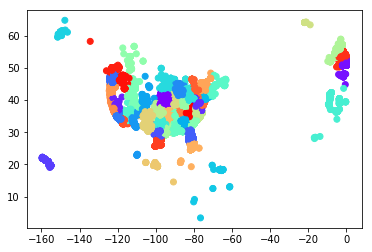

In [37]:
plt.scatter(df_us_samp['lng'], df_us_samp['lat'], c=kmeans.labels_,cmap='rainbow')
#centers_df= pd.DataFrame(kmeans.cluster_centers_,columns=['lat', 'lng'])
#plt.scatter(centers_df['lng'], centers_df['lat'])

In [39]:
#df_us_samp[df_us_samp['center'] == 5]

In [40]:
df_us_samp.head(3)

,userid,lat,lng,center
958713,4466,38.952334,-77.447948,3
444404,1544,39.763549,-86.331929,27
763759,3252,42.051870,-70.185600,21


In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
X =  df_us_samp[['lat', 'lng']]
y = df_us_samp['center']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
knn = KNeighborsClassifier()

In [48]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
y_pred = knn.predict(X_test)

In [52]:
knn.score(X_test, y_test)

0.9979615921038515

In [54]:
X_test['pred'] = y_pred
X_test['actual'] = y_test

D:\sw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\sw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
41.726471, -84.966009
kmeans.cluster_centers_[9], kmeans.cluster_centers_[27]

(array([ 42.2169352 , -87.79098271]), array([ 39.37972353, -85.35389563]))

In [58]:
#X_test[X_test['pred'] != X_test['actual']]

In [59]:
knn.predict([[38.520663,-82.454800]])

array([27])

In [64]:
kmeans.cluster_centers_[27]

array([ 39.37972353, -85.35389563])

In [63]:
np.unique(df_us_samp[df_us_samp['center']==27]['userid'])

array([  40,  107,  146,  147,  195,  393,  423,  431,  448,  476,  484,
        486,  487,  546,  558,  590,  601,  648,  676,  774,  776,  781,
        819,  909,  948,  961,  974, 1004, 1051, 1153, 1194, 1234, 1337,
       1340, 1388, 1414, 1457, 1483, 1511, 1544, 1546, 1776, 1783, 1893,
       1923, 1931, 1970, 2100, 2468, 2534, 2572, 2591, 2615, 2627, 2638,
       2642, 2644, 2648, 2652, 2668, 2680, 2741, 2760, 2765, 2769, 2771,
       2792, 2800, 2833, 2854, 2894, 2901, 2931, 2960, 2990, 3006, 3017,
       3026, 3051, 3069, 3074, 3083, 3085, 3087, 3107, 3123, 3157, 3170,
       3210, 3219, 3223, 3230, 3268, 3275, 3294, 3306, 3307, 3317, 3325,
       3353, 3394, 3396, 3411, 3504, 3507, 3597, 3661, 3834, 3954, 4057,
       4158, 4290, 4393, 4486, 4503, 4505, 4533, 4546, 4585, 4607, 4609,
       4612, 4613, 4617, 4620, 4676, 4702, 4712, 4792], dtype=int64)

In [31]:
inertia=[]
for k in range(1,2000,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_us_samp[['lat','lng']])
    inertia.append(kmeans.inertia_)

KeyboardInterrupt: 

990277.5237115971

In [25]:
50

61299.83698025083

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=50)

- use fit of the kmeans object and pass in data

In [6]:
kmeans.fit(df_us_samp[['lat','lng']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

- check the cluster centers

In [35]:
kmeans.cluster_centers_[:,0]

array([30.26936605, 51.37963172, 37.69423088, 38.84608977, 21.28968866,
       34.15728742, 39.46629511, 48.02727485, 33.34404326, 39.80110873,
       42.38959717, 26.02900606, 39.22805937, 61.1172029 , 42.2169352 ,
       32.87842018, 38.72221309, 18.05157775, 40.82964779, 43.51932188,
       34.21643072, 33.38143497, 40.8506247 , 44.89334092, 30.3224668 ,
       36.09172994, 28.45359807, 55.56487776, 35.55261592, 27.09998451,
       41.55512339, 30.12056793, 35.64096086, 35.00324847, 36.1339132 ,
       46.10789841, 44.50475323, 19.48955865, 34.33615563, 52.2901077 ,
       30.49504914, 64.10623623, 45.16190222, 33.25268964, 39.3740464 ,
       53.26441379, 38.90579184, 39.92356896, 34.03304876, 36.20915352])

In [37]:
len(kmeans.labels_)

93209

In [38]:
kmeans.cluster_centers_
for lat, lng in kmeans.cluster_centers_:
    print(lat, lng)

30.26936604935934 -97.78475464931597
51.37963172478592 -0.35045911395363305
37.694230875089225 -122.17340194887399
38.84608977174501 -76.99509425488415
21.28968866035076 -157.80697665215078
34.15728741745586 -81.24354759275182
39.466295107756096 -89.72399789856098
48.027274854149205 -122.52430378605453
33.34404326374394 -117.19445429558678
39.80110873243931 -105.1667050008289
42.38959716892974 -71.11268366016533
26.029006061530502 -80.40702455178905
39.22805937242771 -94.83627675403427
61.1172029021875 -149.53287002343748
42.21693520168219 -87.79098270855214
32.87842018163755 -96.93193645511977
38.72221309143498 -7.359354514990969
18.051577754624272 -66.2282505081503
40.82964778891345 -73.88833475551063
43.519321876763 -79.6840848221291
34.2164307247905 -84.2770078224579
33.38143496549238 -111.78954711532992
40.8506247004534 -111.73141418942065
44.89334091836136 -93.36135051056687
30.32246679509356 -90.1096571135343
36.09172994402954 -115.1482675467827
28.453598068091054 -81.7015413911

- plot these cluster centers
- plt.scatter(df['lat'], df['lng'], c=kmeans.labels_, cmap='rainbow')

In [7]:
df_us_samp['center'] = kmeans.labels_

In [56]:
df_us_samp.to_csv('with-label.csv')

In [40]:
df_us_samp.head()

,userid,lat,lng,center
958713,4466,38.952334,-77.447948,3
444404,1544,39.763549,-86.331929,44
763759,3252,42.051870,-70.185600,10
23305,112,30.255986,-97.746928,0
969760,4496,28.596401,-81.308044,26


In [8]:
X = df_us_samp[['lat', 'lng']]
y = df_us_samp['center']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB(priors=None)

In [11]:
y_pred = nbc.predict(X_test)

In [12]:
nbc.score(X_test,y_test)

0.9760040052927083

In [44]:
from sklearn.neighbors import KNeighborsClassifier


In [45]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
y_pred = knn.predict(X_test)

In [49]:
y_pred

array([15, 34,  2, ...,  1, 15, 20])

In [51]:
knn.score(X_test, y_test)

0.9980688767299646

In [53]:
knn.predict([[41.877741,-92.645557
]])

array([6])

In [55]:
np.unique(df_us_samp[df_us_samp['center'] == 6]['userid'])

array([ 107,  127,  142,  146,  150,  176,  195,  204,  237,  242,  252,
        253,  256,  273,  319,  335,  343,  392,  408,  448,  483,  503,
        506,  527,  534,  565,  569,  583,  847,  862,  872,  890,  893,
        945, 1114, 1260, 1562, 1574, 1630, 1743, 1833, 1867, 2071, 2198,
       2214, 2236, 2252, 2485, 2515, 2605, 2612, 2631, 2633, 2638, 2652,
       2703, 2741, 2758, 2789, 2813, 2821, 2826, 2836, 2850, 2901, 2925,
       2927, 2937, 2964, 3052, 3123, 3137, 3139, 3157, 3230, 3233, 3235,
       3236, 3295, 3325, 3331, 3336, 3348, 3349, 3364, 3376, 3427, 3475,
       3505, 3529, 3623, 3666, 3715, 3978, 4058, 4088, 4117, 4199, 4402,
       4441, 4607, 4616, 4664, 4746, 4749, 4753, 4756, 4799, 4804],
      dtype=int64)

In [1]:
from sklearn.datasets import make_blobs

In [12]:
df = make_blobs(n_samples=500,centers=5)

In [16]:
make_blobs()

IndexError: tuple index out of range

In [4]:
import pandas as pd


In [10]:
df.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [7]:
plt.plot(pd.DataFrame(df)[0], pd.DataFrame(df)[1])

TypeError: DataFrame constructor called with incompatible data and dtype: could not broadcast input array from shape (500,2) into shape (500)